# Stackoverflow 2023 Survey results analysis and insights about OSS contributions.

The purpose of this projec is to answer the following questions:
- What is the average age group of contributors and which country are the top contributors from?
- What is the relationship between contributors' educational level and their employement status?
- Which language contributors started with and which are they currentluy learning/Using

In [1]:
# importing all necessary library needed to run data

In [2]:
# %load_ext autoreload
# %autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import utils
# import pygwalker as pyg

In [3]:
# reading file and showing top 5 rows to see the content

In [4]:
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
# pd.set_option('display.max_columns', None)

In [5]:
df.shape

(89184, 84)

In [6]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [7]:
schema

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...,...
73,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
74,QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
75,QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
76,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR


In [8]:
# Droping columns that irrelevant to the data

In [9]:
# df.drop(columns=df.columns[33:74], inplace=True)

In [10]:
df.drop(columns=df.columns[33:74]).shape
df = df.rename(columns={"United Kingdom of Great Britain and Northern Ireland  ": "UK & Ireland"})


In [11]:
# Checking the ratio of missing values in the Dataframe 

In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing')[:30]

,column_name,percent_missing
ResponseId,ResponseId,0.000000
Q120,Q120,0.000000
MainBranch,MainBranch,0.000000
Age,Age,0.000000
EdLevel,EdLevel,1.357867
AISelect,AISelect,1.357867
NEWSOSites,NEWSOSites,1.357867
Country,Country,1.357867
Employment,Employment,1.441963
SOAccount,SOAccount,1.493541


In [13]:
print("columns with no missing values: ", set(df.columns[df.isnull().mean() == 0.0]))

columns with no missing values:  {'Age', 'ResponseId', 'Q120', 'MainBranch'}


# 2. Data Analysis

#### Age Group of all repondents

In [14]:
age_vals = df.Age.value_counts(ascending = True)
age_vals_percentage = (age_vals[1:] * 100 / df.Age.dropna().shape[0])
age_vals_percentage

Age
65 years or older      1.313016
55-64 years old        3.803373
Under 18 years old     4.628633
45-54 years old        9.344726
18-24 years old       20.105624
35-44 years old       23.022067
25-34 years old       37.279108
Name: count, dtype: float64

### Question 1: What is the average age group of contributors and which country are the top contributors from?

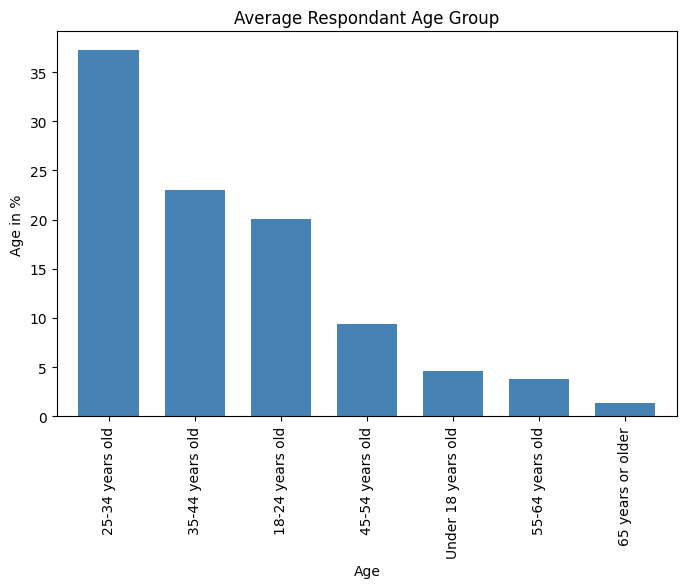

In [23]:
plt.ylabel("Age in %")
plt.title("Average Respondant Age Group")
ax = age_vals_percentage.sort_values(ascending = False).plot(kind="bar",figsize=(8,5), width = .7, edgecolor=None, color="steelblue")
plt.show()



### Number of survey respondents by country 

In [16]:
numb_respby_country = df.Country.value_counts(ascending = False).head(10)

In [17]:
numb_respby_country

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Name: count, dtype: int64

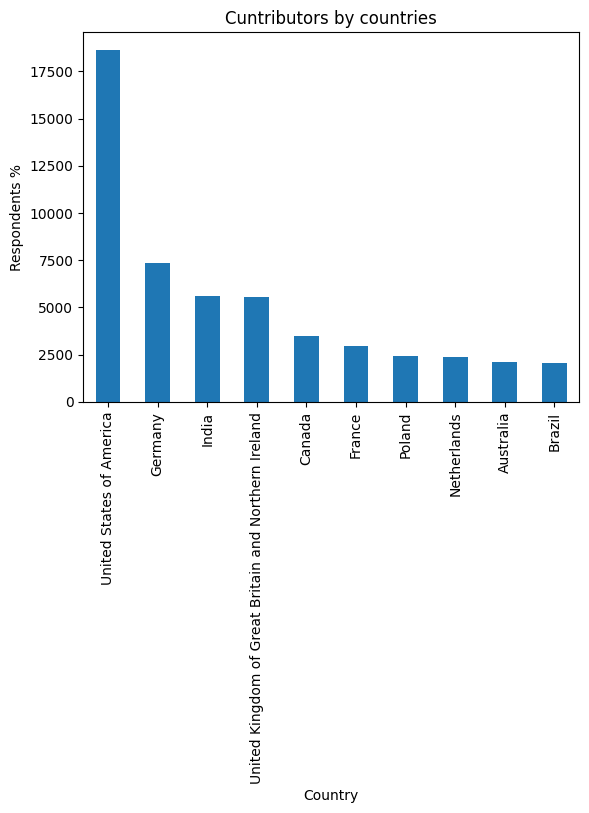

In [18]:
plt.ylabel("Respondents %")
plt.title("Cuntributors by countries");
numb_respby_country.plot.bar();


### Education Level vs Employement

In [19]:
df.EdLevel.head(20)

0                                                   NaN
1          Bachelor’s degree (B.A., B.S., B.Eng., etc.)
2          Bachelor’s degree (B.A., B.S., B.Eng., etc.)
3          Bachelor’s degree (B.A., B.S., B.Eng., etc.)
4          Bachelor’s degree (B.A., B.S., B.Eng., etc.)
5     Some college/university study without earning ...
6     Some college/university study without earning ...
7          Bachelor’s degree (B.A., B.S., B.Eng., etc.)
8       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
9          Bachelor’s degree (B.A., B.S., B.Eng., etc.)
10         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
11         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
12         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
13      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
14      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
15      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
16         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
17      Master’s degree (M.A., M.S., M.Eng., MBA

In [20]:
df.Employment.unique()

array([nan, 'Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Student, part-time',
       'Not employed, but looking for work;Student, full-time',
       'Employed, part-time;Student, part-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time', 'I prefer not to say',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Student, part-time',
       'Not employed, but looking for work;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Retired', 'Employed, full-time;Student, full-time',
       'Student, full-time;Student, part-time',
       '

In [21]:
employment = df['Employment'].dropna().apply(lambda row: str(row).split(', or')).explode().unique()

In [22]:
employment.shape

(90,)